In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/tomek/ib_tools')
import matplotlib.pyplot as plt
%matplotlib inline
from tester import get_data, get_candles, get_vol, get_avg_vol

In [2]:
contract = 'NQ'
start_date= '20190101'
end_date = '20191231'
time_int = 30
vol_lookback = 200

In [3]:
data = get_data(contract, start_date, end_date)
# using all data to get candle size -> avg out over the period
candles = get_candles(data, get_avg_vol(data, time_int)).set_index('date')
vols = get_vol(candles, vol_lookback).dropna()

In [4]:
data

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-01-02 00:00:00,6349.50,6355.75,6344.00,6353.00,332,6348.950,188
2019-01-02 00:01:00,6352.50,6364.75,6351.50,6361.25,296,6359.125,226
2019-01-02 00:02:00,6360.75,6371.50,6359.25,6368.50,339,6366.850,256
2019-01-02 00:03:00,6369.25,6371.75,6366.00,6366.25,195,6368.825,138
2019-01-02 00:04:00,6367.00,6367.50,6364.50,6366.25,154,6366.425,104
...,...,...,...,...,...,...,...
2019-12-31 22:55:00,8769.75,8770.75,8768.75,8770.00,83,8769.825,50
2019-12-31 22:56:00,8770.25,8771.25,8770.25,8770.25,41,8770.650,19
2019-12-31 22:57:00,8770.50,8771.00,8769.75,8769.75,48,8770.250,25


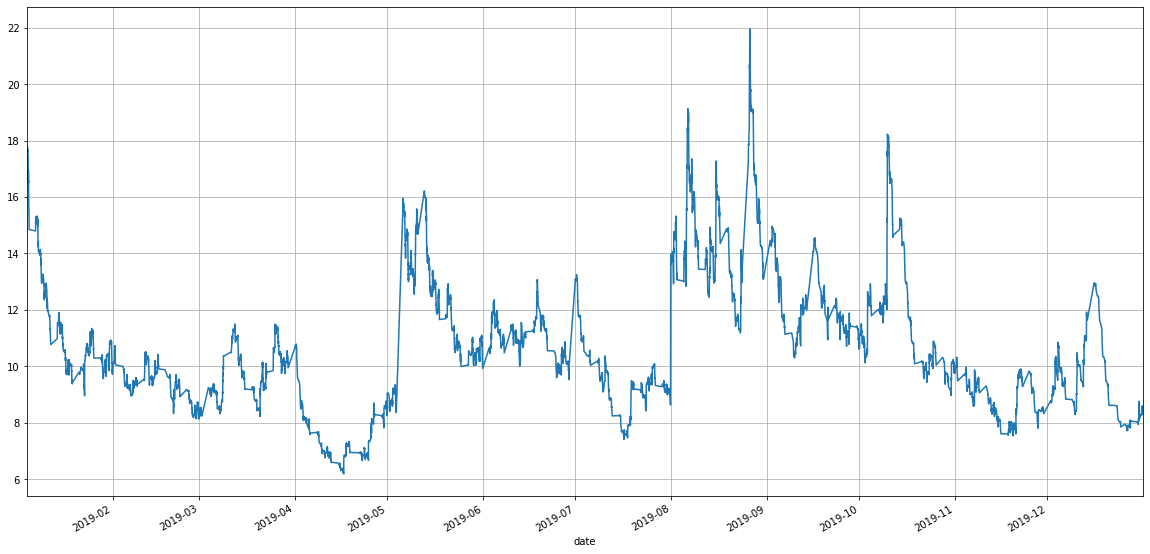

In [5]:
vols.plot(figsize=(20,10), grid=True);

In [6]:
vols.loc['20190501':].iloc[100:].head(50)

date
2019-05-02 20:59:00    9.095224
2019-05-02 21:12:00    9.054036
2019-05-02 21:26:00    9.141498
2019-05-02 21:40:00    9.143414
2019-05-02 21:50:00    9.097562
2019-05-02 21:57:00    9.063843
2019-05-02 22:00:00    9.042909
2019-05-03 01:14:00    9.031879
2019-05-03 04:16:00    9.016174
2019-05-03 07:39:00    9.249481
2019-05-03 10:21:00    9.255771
2019-05-03 13:02:00    9.214230
2019-05-03 14:12:00    9.203364
2019-05-03 14:31:00    9.188586
2019-05-03 14:46:00    9.344577
2019-05-03 15:06:00    9.303086
2019-05-03 15:29:00    9.273719
2019-05-03 15:33:00    9.229340
2019-05-03 15:38:00    9.183441
2019-05-03 15:44:00    9.139417
2019-05-03 15:49:00    9.144765
2019-05-03 15:55:00    9.157401
2019-05-03 16:01:00    9.129687
2019-05-03 16:07:00    9.088825
2019-05-03 16:14:00    9.045914
2019-05-03 16:22:00    9.004052
2019-05-03 16:32:00    9.003810
2019-05-03 16:41:00    8.972203
2019-05-03 16:49:00    8.968727
2019-05-03 16:59:00    8.942706
2019-05-03 17:03:00    8.940794
201

In [7]:
candles.loc['2019-05-03 21:59:00':].head(50)

,open,high,low,close,barCount,volume
date,,,,,,
2019-05-03 21:59:00,7859.75,7859.75,7855.75,7857.25,2530,8069
2019-05-03 22:33:00,7857.00,7868.50,7855.50,7868.25,4348,14052
2019-05-06 00:07:00,7868.00,7872.50,7711.50,7736.50,4804,8987
2019-05-06 00:36:00,7735.50,7735.50,7699.00,7708.75,5797,9786
2019-05-06 01:48:00,7708.50,7751.00,7708.25,7739.75,5623,9477
2019-05-06 02:05:00,7739.75,7739.75,7691.00,7706.25,6092,9530
2019-05-06 02:37:00,7706.75,7719.00,7694.25,7696.50,6275,9622
2019-05-06 03:02:00,7696.50,7702.50,7671.50,7682.75,5776,9301
2019-05-06 03:36:00,7682.75,7691.50,7667.50,7687.00,5942,9523
